The Iris dataset contains measurements of iris flowers, specifically their sepal and petal lengths and widths. The dataset includes three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Our business objective could be to develop a model that can accurately cluster these flower samples into their respective species based on the given features. This model can then be used for automated classification in botanical studies or in a commercial setting for flower classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

**Step 1 : Load the dataset**

In [8]:
# Loading the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
print(feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Step 2 :Data Exploration**

In [10]:
# Convert to DataFrame for easier exploration
iris_df = pd.DataFrame(X, columns=feature_names)
print(iris_df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Descriptive Statistics of the Iris Dataset:

**Sepal Length (cm):** Ranges from 4.3 to 7.9 cm, with a mean of approximately 5.84 cm.

**Sepal Width (cm):** Varies between 2.0 and 4.4 cm, with an average of around 3.06 cm.

**Petal Length (cm):** Extends from 1.0 to 6.9 cm, with a mean of nearly 3.76 cm.

**Petal Width (cm):** Spans from 0.1 to 2.5 cm, with an average of 1.2 cm.

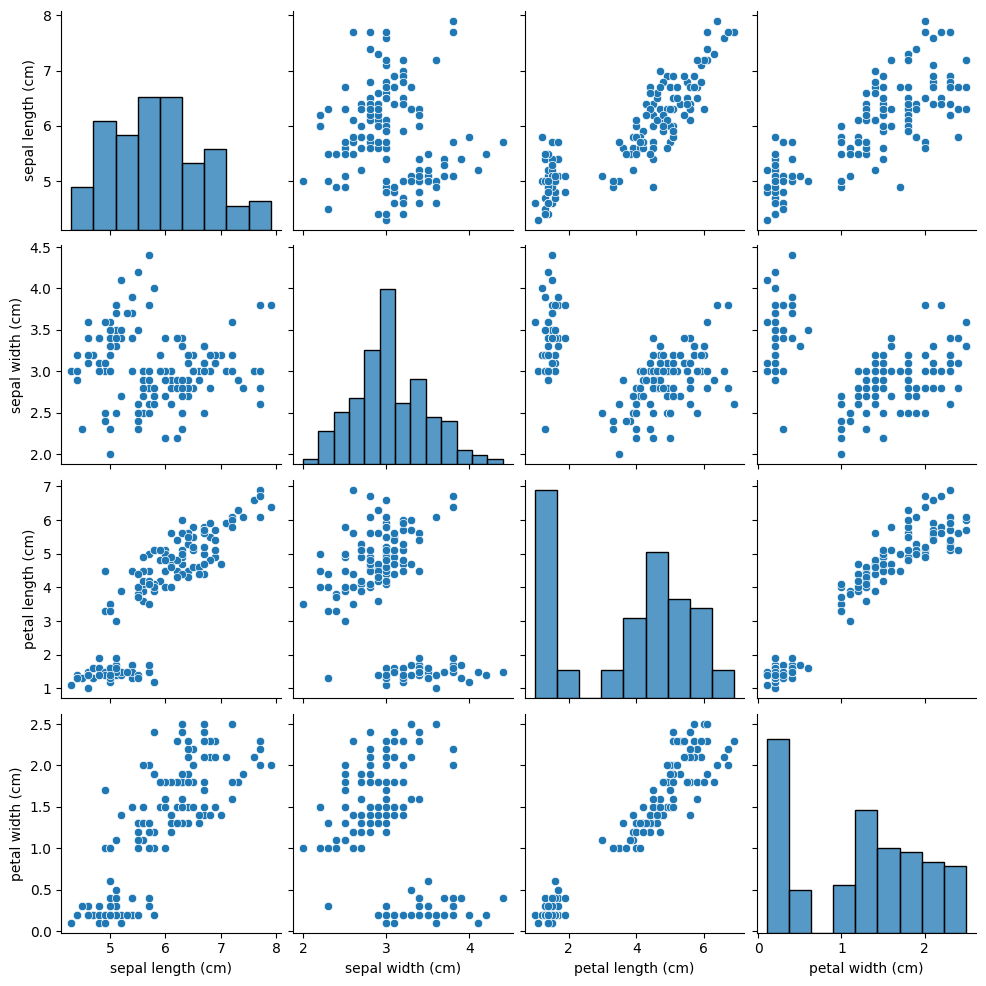

In [11]:
# Pairplot to visualize the relationships between features
sns.pairplot(iris_df)
plt.show()

**Pairplot Visualization:**

The pairplot reveals distinct clusters, especially when considering petal length and petal width. This suggests that these features might be particularly useful for clustering the Iris species.


**Step 3 : Data Preprocessing**

For this dataset, preprocessing is minimal and does not require scaling.

**Step 4 : Apply Gaussian Mixture Model**

In [12]:
# Creating and fitting the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)

# Predicting the clusters
clusters = gmm.predict(X)


**Step 5 : Analyze Results**

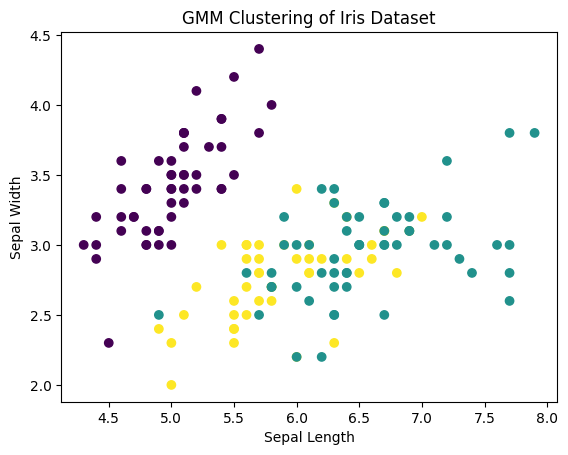

In [13]:
# Calculating the silhouette score
silhouette = silhouette_score(X, clusters)

# Visualizing the clusters (using the first two features for simplicity)
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('GMM Clustering of Iris Dataset')
plt.show()


**Analysis of GMM Clustering Results**

**Visualization of Clusters:**

The scatter plot visualizes the clusters based on Sepal Length and Sepal Width. Each color represents a different cluster identified by the Gaussian Mixture Model.
The clusters appear well-separated, particularly for one of the groups (in purple), which suggests effective clustering.

**Silhouette Score:**

The silhouette score for our GMM clustering is approximately 0.501.
This score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A score of 0.501 suggests a reasonably good structure of the clusters.
